# Taitanic Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data 

In [2]:
data = pd.read_csv("titanic.csv")
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.shape

(418, 12)

In [4]:
train_y = df['Survived']
train_y.shape

(418,)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<AxesSubplot:>

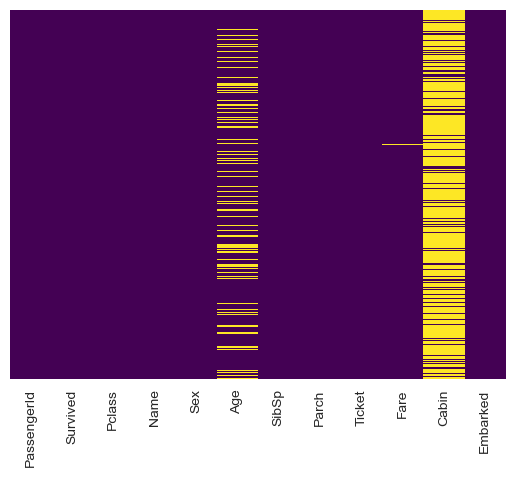

In [62]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# Understanding the Data 

In [6]:
# understanding more about  the train data 
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


<AxesSubplot:>

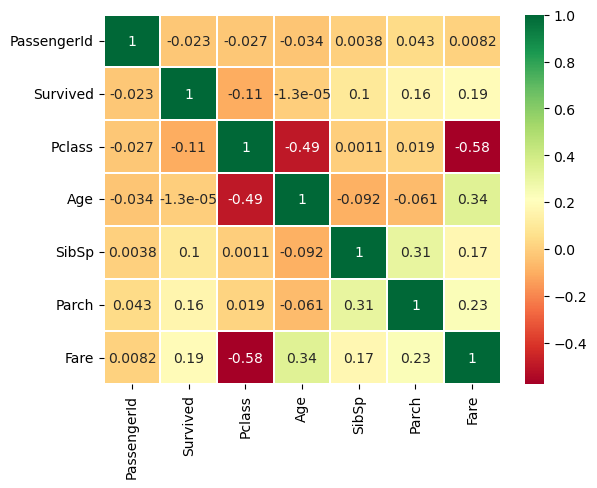

In [7]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

Here we can clearly observe that there is a positive correlation between sibsp and parch and servived and parch .

Here it can be seen that in the variable Cabin has more than 60% of the data is missing .                                        
The variable age also has missing values with are less that 20%.

# Data Preprocessing 

## Droping the unwanted columns 

In [8]:
df1 = df.drop('Name',axis =1)  #This variable is not required in the analysis process 
df1 = df1.drop('Ticket',axis =1) # This variable is not required in the analysis process 
df1 = df1.drop('Cabin',axis = 1) #number of non negative data points is less than 30% of the whole data 
df1 = df1.drop('PassengerId',axis =1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


## Handing missing values

# Age 

Text(0.5, 1.0, 'The distribution of Age  ')

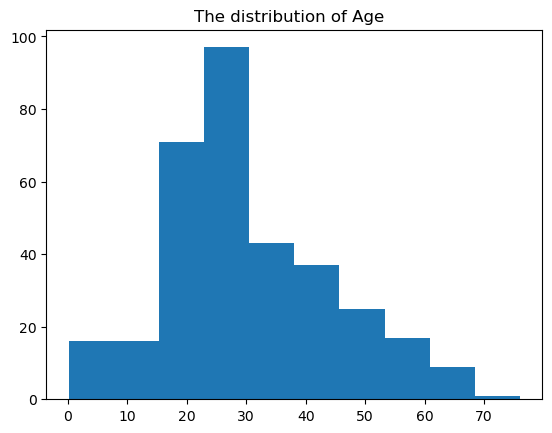

In [9]:
plt.hist(df1[['Age']] )
plt.title("The distribution of Age  ")

In [10]:
# handing the variable"AGE"
df1[['Age']].describe()

,Age
count,332.000000
mean,30.272590
std,14.181209
min,0.170000
25%,21.000000
50%,27.000000
75%,39.000000
max,76.000000


In [11]:
df1['Age'].mode()

0    21.0
1    24.0
Name: Age, dtype: float64

In [12]:
#  now replacing the null valuese by median 
df1['Age'] = df['Age'].fillna(df1['Age'].median())


In [13]:
df1['Age'].isnull().sum()


0

In [14]:
df1['Fare'] = df['Fare'].fillna(df1['Fare'].mean())

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


<AxesSubplot:>

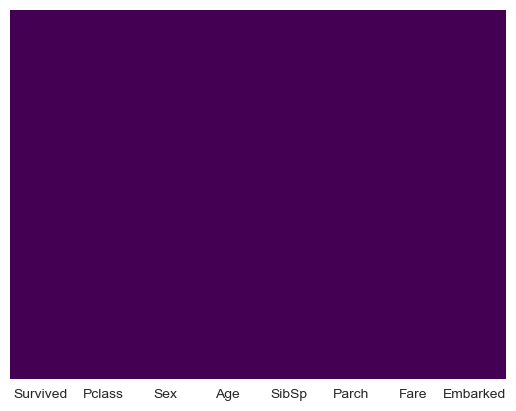

In [63]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Label Encoder

In [16]:
##Handing categorical feature Sex
##F:0, M:1
df1['Sex']=pd.get_dummies(df['Sex'],drop_first=1)


In [17]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,Q
1,1,3,0,47.0,1,0,7.0000,S
2,0,2,1,62.0,0,0,9.6875,Q
3,0,3,1,27.0,0,0,8.6625,S
4,1,3,0,22.0,1,1,12.2875,S


In [18]:
import sklearn as sk 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [19]:
df1['Embarked'] = le.fit_transform(df1['Embarked'])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


Text(0.5, 1.0, 'Genderwise survival ')

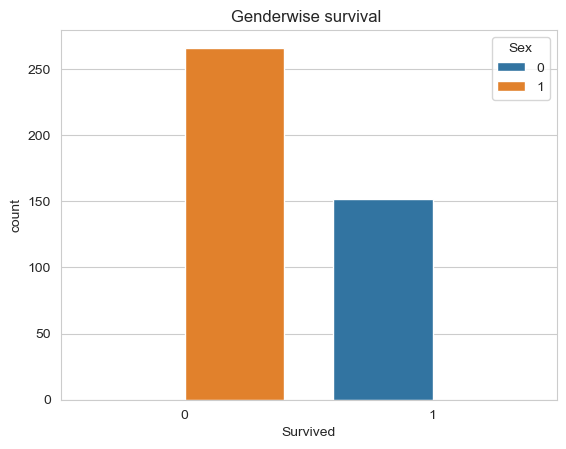

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df1, hue = 'Sex')
plt.title("Genderwise survival ")

<AxesSubplot:xlabel='Survived', ylabel='count'>

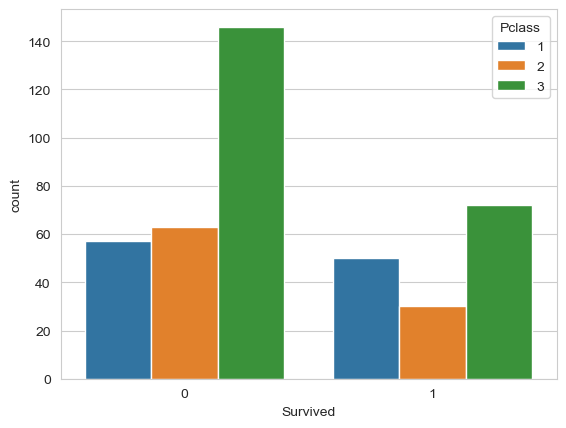

In [21]:
sns.countplot(x='Survived',hue='Pclass',data=df1)


Text(0.5, 1.0, 'Siblings and spoues count ')

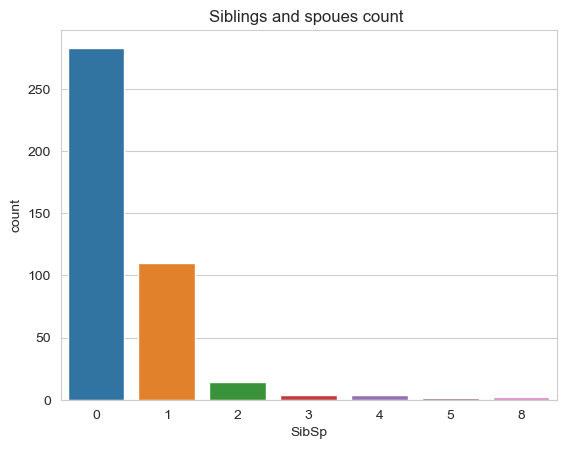

In [22]:

sns.countplot(x='SibSp',data=df1)
plt.title("Siblings and spoues count ")

# Prepating Data for Modeling 

In [28]:
Y = df1['Survived']

In [30]:
X = df1.drop('Survived',axis = 1)

In [27]:
import sklearn as sk 
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 ,stratify = Y ,random_state = 3)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(292, 7)
(126, 7)
(292,)
(126,)


# Model fitting 

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()
model4 = RandomForestClassifier()
model5 =  KNeighborsClassifier()

In [43]:
model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)
model4.fit(X_train,Y_train)
model5.fit(X_train,Y_train)

KNeighborsClassifier()

# Accuracy  

In [45]:
print(" Accuracy for logistic regression     : ",  model1.score(X_train,Y_train)*100)
print(" Accuracy for DecisionTreeClassifier  : ",  model2.score(X_train,Y_train)*100)
print(" Accuracy for Support vector machine  : ",  model3.score(X_train,Y_train)*100)
print(" Accuracy for RandomForestClassifier  : ",  model4.score(X_train,Y_train)*100)
print(" Accuracy for  KNeighborsClassifier   : ",  model5.score(X_train,Y_train)*100)

 Accuracy for logistic regression     :  100.0
 Accuracy for DecisionTreeClassifier  :  100.0
 Accuracy for Support vector machine  :  66.43835616438356
 Accuracy for RandomForestClassifier  :  100.0
 Accuracy for  KNeighborsClassifier   :  80.82191780821918


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Now we can see that the accuracy of 3 models is 100% now lets check with model is better with the help of confustion matrix for these three models 

# Make Predictions 

Here we are considering ythe models with highest  accuracy 

## Logistic regression 

In [49]:
expected = Y_test
predicted1 = model1.predict(X_test)
predicted1

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

## Decision Tree Classifier  

In [50]:
expected = Y_test
predicted2 = model2.predict(X_test)
predicted2

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

## Random Forest Classifier 

In [51]:
expected = Y_test
predicted3 = model4.predict(X_test)
predicted3

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

# Confution Matrix

In [53]:
from sklearn import metrics 

In [54]:
print(metrics.confusion_matrix(expected , predicted1))
print(metrics.confusion_matrix(expected , predicted2))
print(metrics.confusion_matrix(expected , predicted3))

[[80  0]
 [ 0 46]]
[[80  0]
 [ 0 46]]
[[80  0]
 [ 0 46]]


In [56]:
print(metrics.classification_report(expected , predicted1))
print(metrics.classification_report(expected , predicted2))
print(metrics.classification_report(expected , predicted3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        46

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        46

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        46

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



# Conclusion : 

1. The Logestic regression model , Decision Tree Classifier  model and the Random Forest Classifier model are the best fix for 
the given data set .